# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [5]:
# your code here
employees = pd.read_csv('employees.csv', index_col=0)

In [6]:
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [7]:
# Method 1
# your code here
employees.groupby('Department').mean()['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [9]:
# Method 2
# your code here
pd.pivot_table(employees, values='Salary', index='Department')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [23]:
employees.count()

Name          9
Department    9
Education     9
Gender        9
Title         9
Years         9
Salary        9
dtype: int64

#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [32]:
# your code here
pd.pivot_table(employees, values='Salary', index=['Department', 'Title'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [33]:
# your code here
pd.pivot_table(employees, values=['Salary', 'Years'], index=['Department', 'Title'])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [38]:
# your code here
pd.pivot_table(employees, values=['Salary', 'Name'], index=['Department', 'Title'], aggfunc={'Salary': np.mean, 'Name': 'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [43]:
# your code here
pd.pivot_table(employees, values='Salary', index=['Department', 'Title'], aggfunc=['median', 'min', 'max', 'std'])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
There's not much variation considering the very low number of employees. The std is not calculated in some cases
since there's only a single employee for that specific Department/Title combination. I will just fill that with 0
since there can't be no deviation if there's a single value"""

#### Based on your comments, fill the missing values with an appropriate value.

In [46]:
# your code here
pd.pivot_table(employees, values='Salary', index=['Department', 'Title'], aggfunc=['median', 'min', 'max', 'std'], fill_value=0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

Using fill_value=0 is not working for some reason

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [49]:
# your code here
pd.pivot_table(employees, values=['Salary', 'Name'], index='Department', aggfunc={'Salary': 'sum', 'Name': 'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [50]:
# your code here
pd.pivot_table(employees, index=['Department', 'Title'], values=['Years', 'Salary'], aggfunc={'Years': 'sum', 'Salary': 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [53]:
# your code here
fitbit = pd.read_csv('fitbit.csv', index_col=0)

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [57]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [58]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [54]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [56]:
fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [61]:
# your code here
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [62]:
import matplotlib.pyplot as plt

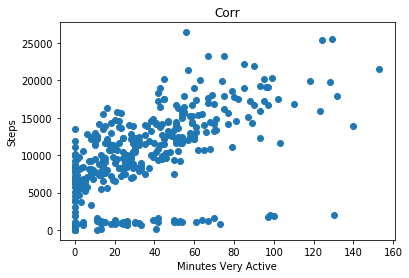

In [75]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Corr')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [69]:
"""
It seems that there may be a positive correlation between the two attributes considering both the plot and the
calculated corr value of 0.57. Still, there seems to be quite a few rows with a low to medium number of steps but
no Minutes Very Active
"""

'\nIt seems that there may be a positive correlation between the two attributes considering both the plot and the\ncalculated corr value of 0.57\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [70]:
# your code here
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

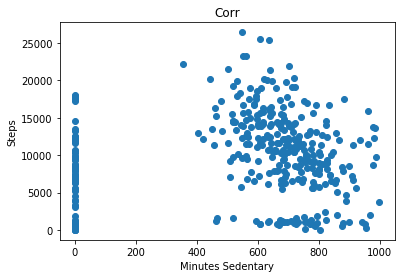

In [71]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Corr')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
If we decide to ignore the rows where there have been 0 Minutes Sedentary it seems that there's a negative relationship
between the two attributes i.e. the more minutes sedentary the less steps, even though it does not seem
nearly as strong as the previous one
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [72]:
# your code here
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

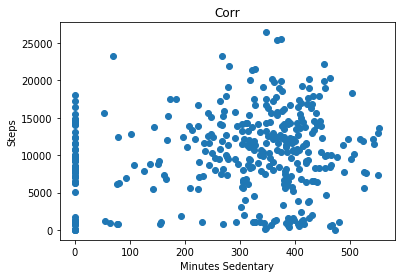

In [73]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Corr')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
Again, the presence of a lot of outliers with 0 Minutes Sedentary makes this more difficult to comment, but the
data seems quite scattered and I don't believe there's a relation. I would expect heavy users of the fitbit to keep it
on during the night as well which would be compensated by physical activity during the day"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [77]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [81]:
# your code here
fitbit[columns].corr().sort_values('Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

Steps correlate strongly with minutes very active, moderately with Floors and Calorie burned and weakly with the remaining two attributes

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [82]:
# your code here
time_grades = pd.read_csv('time_grades.csv', index_col=0)

In [84]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

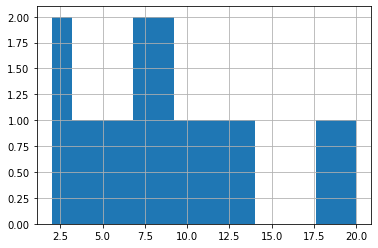

In [105]:
# your code here
time_grades['Study time'].hist(bins=len(time_grades))

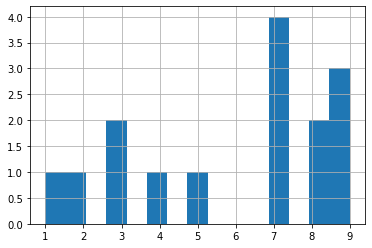

In [106]:
time_grades['Grade'].hist(bins=len(time_grades))

###### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [95]:
time_grades[['Study time', 'Grade']].corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [96]:
time_grades[['Study time', 'Grade']].corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [97]:
"""
Both correlations are VERY high so I would assume that yes, there is a correlation
"""

'\nBoth correlations are VERY high so I would assume that yes, there is a correlation\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

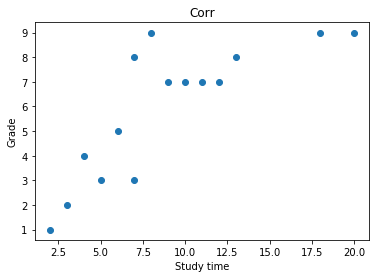

In [98]:
# your code here
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Corr')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
There seems to be a very strong positive correlation between the two variables which was already predicted by the actual correlation
value calculated before. A more numerous sample would be surely helpful to confirm that, though"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [99]:
"""
The Spearman correlation shows how much the relationship between two variables can be described using a monotonic function,
i.e. one that always increases or decreases. It does this by comparing the rank values of those two variables.
This means that two variables in which for every increase in the x-value the y-value also increases the Spearman's correlation
value will be 1 REGARDLESS OF THE AMOUNT OF THE INCREASE. This is different from the Pearson since having a variable
that is monotonic but that has different degrees of increase WILL not return a Pearson's correlation value of 1.
"""

"\nThe Spearman correlation shows how much the relationship between two variables can be described using a monotonic function,\ni.e. one that always increases or decreases. It does this by comparing the rank values of those two variables.\nThis means that two variables in which for every increase in the x-value the y-value also increases the Spearman's correlation\nvalue will be 1 REGARDLESS OF THE AMOUNT OF THE INCREASE. This is different from the Pearson since having a variable\nthat is monotonic but that has different degrees of increase WILL not return a Pearson's correlation value of 1.\n"